## m1_key_rate_vs_guard_band

Creating a figure showing the key rate achievable with m = 1, for constant noise. That is, we sweep through guard band width and visualise the key rate.

In [6]:
from guard_band_postselection import GBSR
import numpy as np
import sympy as sp
import importlib
import matplotlib.pyplot as plt
from matplotlib import patches
from tqdm.notebook import tqdm
from tqdm import tqdm_notebook
# import tikzplotlib

In [7]:
# Create a GBSR instance with the following parameters. These parameters are those used in the experimental paper
# Modulation variance: 2.2 SNU (from SPIE Photonex manuscript)
# Excess noise at 25 km: 0.02 SNU (from Sci Rep paper graph)
# Transmissivity at 25 km: 0.32 (-5 dB), assuming -0.2 dB/km loss.

gbsr = GBSR.GBSR(1, 2.2, 0.32, 0.02, num_points_on_axis = 32)

0.002418444389072739


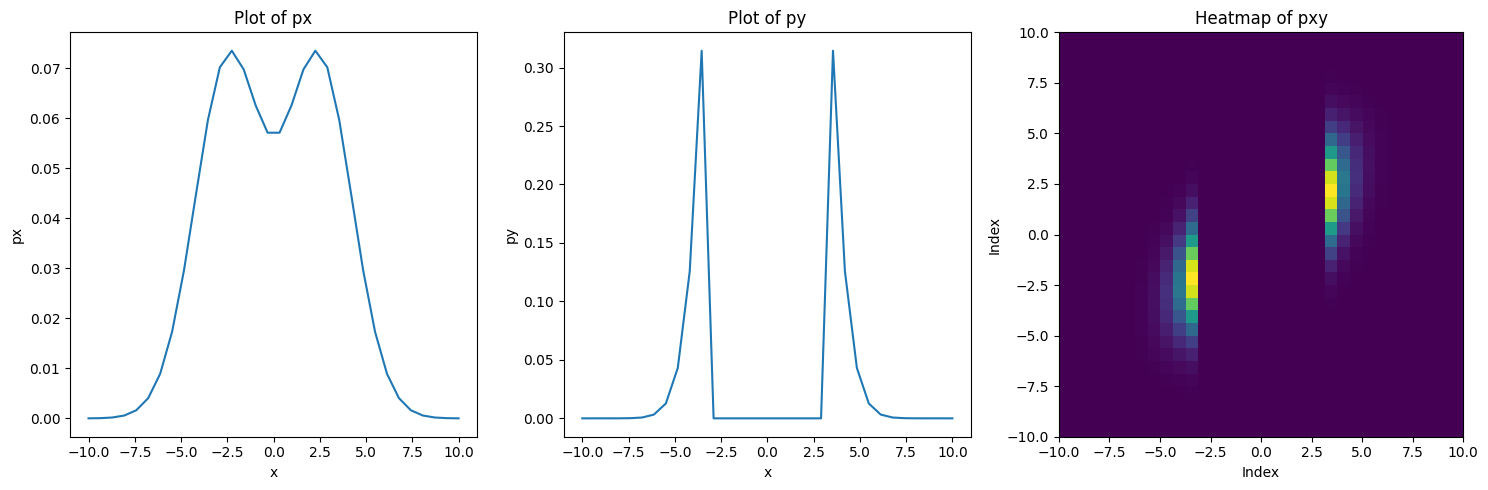

Quantisation entropy: 1.00
Error rate: 0.00
Classical leaked information: 0.00
Holevo information: 3.99
Therefore, key rate: -0.01


In [12]:
# Inspect non-post-selected marginals, via enforcing no guard band

tau_arr = np.array([-np.inf, 0.0, np.inf])
g_arr = np.array([[0.0, 0.0], [3.5, 3.5], [0.0, 0.0]])

gbsr._evaluate_p_pass_and_Q_PS_values(tau_arr, g_arr)

print(gbsr.p_pass)

gbsr.plot_marginals_PS()

quantisation_entropy = gbsr.evaluate_quantisation_entropy(tau_arr)
error_rate = gbsr.evaluate_error_rate(tau_arr, g_arr)
classical_leaked_information = gbsr._binary_entropy(error_rate)
holevo_information = gbsr._evaluate_holevo_information(*gbsr.evaluate_a_PS_b_PS_c_PS(tau_arr, g_arr))

# Print the current stats nicely
print(f"Quantisation entropy: {quantisation_entropy:.2f}")
print(f"Error rate: {error_rate:.2f}")
print(f"Classical leaked information: {classical_leaked_information:.2f}")
print(f"Holevo information: {holevo_information:.2f}")
print("=====================================")
print(f"Therefore, key rate: {gbsr.evaluate_key_rate_in_bits_per_pulse(tau_arr, g_arr, quantisation_entropy=quantisation_entropy, classical_leaked_information=classical_leaked_information, holevo_information=holevo_information):.2f}")

In [9]:
# Next, sweep through guard band span values, performing the same analysis as above:
half_spans = np.linspace(0, 2.5, 10)

quantisation_entropies = []
error_rates = []
classical_leaked_informations = []
holevo_informations = []
key_rates = []

for half_span in tqdm(half_spans, desc="Processing"):

    tau_arr = np.array([-np.inf, 0.0, np.inf])
    g_arr = np.array([[0.0, 0.0], [half_span, half_span], [0.0, 0.0]])

    gbsr._evaluate_p_pass_and_Q_PS_values(tau_arr, g_arr)

    quantisation_entropy = gbsr.evaluate_quantisation_entropy(tau_arr)
    error_rate = gbsr.evaluate_error_rate(tau_arr, g_arr)
    classical_leaked_information = gbsr._binary_entropy(error_rate)
    # holevo_information = gbsr._evaluate_holevo_information(*gbsr.evaluate_a_PS_b_PS_c_PS(tau_arr, g_arr))
    holevo_information = gbsr._evaluate_holevo_information(gbsr.a, gbsr.b, gbsr.c)

    quantisation_entropies.append(quantisation_entropy)
    error_rates.append(error_rate)
    classical_leaked_informations.append(classical_leaked_information)
    holevo_informations.append(holevo_information)

    key_rates.append(gbsr.evaluate_key_rate_in_bits_per_pulse(tau_arr, g_arr, quantisation_entropy=quantisation_entropy, classical_leaked_information=classical_leaked_information, holevo_information=holevo_information))

Processing:   0%|          | 0/10 [00:00<?, ?it/s]

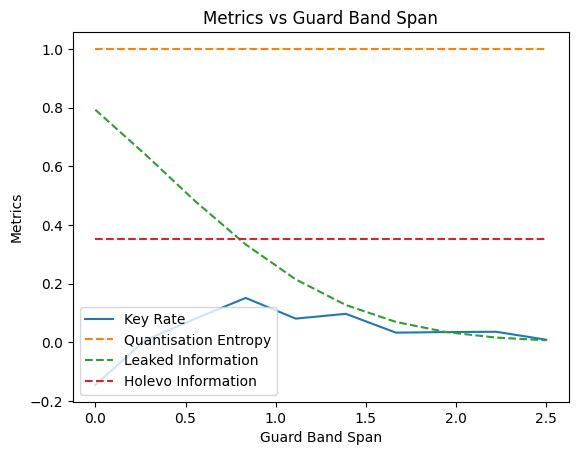

In [10]:
# Next, plot the results. That is, the key rate as a function of guard band span
plt.plot(half_spans, key_rates, label='Key Rate')

# Plot other metrics with dashed lines
plt.plot(half_spans, quantisation_entropies, '--', label='Quantisation Entropy')
# plt.plot(half_spans, error_rates, '--', label='Error Rate')
plt.plot(half_spans, classical_leaked_informations, '--', label='Leaked Information')
plt.plot(half_spans, holevo_informations, '--', label='Holevo Information')

plt.xlabel('Guard Band Span')
plt.ylabel('Metrics')
plt.title('Metrics vs Guard Band Span')
plt.legend()
plt.show()